In [12]:
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Splitting train test dataset

In [3]:
imdb_data = pd.read_pickle('pickles/cleaned_data2.pkl')

X = imdb_data.review
y = imdb_data.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Model

In [4]:
# Store all models

models = {}

### Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression


lr_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)),
])

# Fitting lr model
lr_clf.fit(X_train, y_train)

models['lr_clf'] = lr_clf
print('Logistic Regression classifire added!')

Logistic Regression classifire added!


### Naive Bayes Classifier

In [6]:
from sklearn.naive_bayes import MultinomialNB


nb_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Fitting lr model
nb_clf.fit(X_train, y_train)


models['nb_clf'] = nb_clf
print('Naive Bayes Classifier added!')

Naive Bayes Classifier added!


### Supprot Vector Classifier

In [7]:
from sklearn.svm import LinearSVC

svc_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC()),
])

# Fitting svm classifier model
svc_clf.fit(X_train, y_train)

models['svc_clf'] = svc_clf
print('Supprot Vector Classifier added!')

Supprot Vector Classifier added!


### Regularized linear models with stochastic gradient descent (SGD) learning

In [8]:
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


models['sgd_clf'] = grid_search
print('SGD added!')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 14.8min finished


SGD added!


In [10]:
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'l2'
	vect__max_df: 1.0
	vect__ngram_range: (1, 2)


# Compare Accuracy

### Confusion Matrix

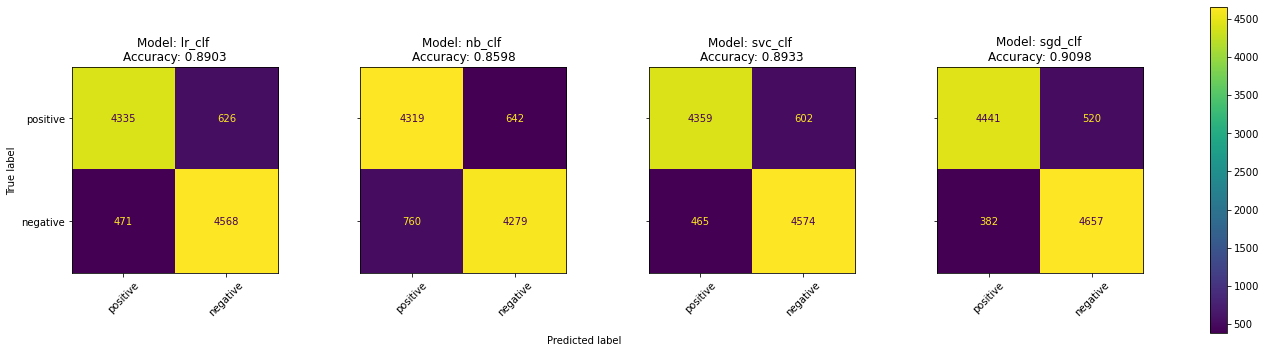

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline


f, axes = plt.subplots(1, 4, figsize=(24, 6), sharey='row')

for i, (name, classifier) in enumerate(models.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cf_matrix,
        display_labels=['positive', 'negative']
    )
    disp.plot(ax=axes[i], xticks_rotation=45)
    
    accuracy = accuracy_score(y_pred, y_test)
    disp.ax_.set_title(f'Model: {name} \nAccuracy: {accuracy}')
    
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

### Classification Report

In [38]:
from sklearn.metrics import classification_report

for name, clf in models.items():
    y_pred = clf.predict(X_test)
    print('-'*20,' '*2,'Classifier: ', name, ' '*2, '-'*20)
    print(classification_report(y_test, y_pred))

--------------------    Classifier:  lr_clf    --------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

--------------------    Classifier:  nb_clf    --------------------
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4961
           1       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

--------------------    Classifier:  svc_clf    --------------------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.9